In [16]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler



import matplotlib.pyplot as plt

# Load the data 
mcdonalds = pd.read_csv('C:\\Users\\Dell Pc\\Downloads\\EV segmentation')
mcdonalds.drop(["Date"],axis=1,inplace=True)
# Encode categorical columns using Label Encoding
label_encoders = {}
categorical_columns = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']

for col in categorical_columns:
    le = LabelEncoder()
    mcdonalds[col] = le.fit_transform(mcdonalds[col])
    label_encoders[col] = le

# Display the column names
print("Column names:", mcdonalds.columns.tolist())

# Display dimensions of the dataset
print("Dataset dimensions:", mcdonalds.shape)

# Display the first 3 rows of the dataset
print("First 3 rows of the dataset:")
print(mcdonalds.head(3))

Column names: ['Year', 'Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']
Dataset dimensions: (96845, 7)
First 3 rows of the dataset:
     Year  Month_Name  State  Vehicle_Class  Vehicle_Category  Vehicle_Type  \
0  2014.0           4      1              0                 4            11   
1  2014.0           4      1              1                 4            11   
2  2014.0           4      1              2                 4            11   

   EV_Sales_Quantity  
0                0.0  
1                0.0  
2                0.0  


In [2]:
# Extract the first 11 columns
MD_x = mcdonalds.iloc[:, :7]
# Calculate and display the column-wise mean values, rounded to 2 decimal places
col_means = MD_x.mean().round(2)
print("Column-wise mean values:\n", col_means)

Column-wise mean values:
 Year                 2018.62
Month_Name              5.49
State                  17.19
Vehicle_Class          31.60
Vehicle_Category        2.83
Vehicle_Type            8.21
EV_Sales_Quantity      37.11
dtype: float64


In [3]:
# Initialize PCA and fit on the binary data
pca = PCA(n_components=7)  # Full components to match R output
MD_pca = pca.fit(MD_x)

# Display explained variance ratios for each component
print("Explained Variance Ratios:\n", np.round(MD_pca.explained_variance_ratio_, 4))

# Cumulative variance explained by each component
cumulative_variance = np.cumsum(MD_pca.explained_variance_ratio_).round(4)
print("Cumulative Variance:\n", cumulative_variance)

# Print PCA component loadings (factor loadings), rounded to 2 decimal places
loadings = np.round(MD_pca.components_.T, 2)
print("PCA Loadings:\n", loadings)

Explained Variance Ratios:
 [9.972e-01 2.100e-03 5.000e-04 1.000e-04 1.000e-04 0.000e+00 0.000e+00]
Cumulative Variance:
 [0.9972 0.9993 0.9998 0.9999 1.     1.     1.    ]
PCA Loadings:
 [[ 0.   -0.01 -0.01 -0.06 -0.02  1.    0.  ]
 [ 0.   -0.   -0.   -0.    1.    0.02 -0.  ]
 [ 0.   -0.01  1.   -0.01  0.    0.01 -0.  ]
 [-0.    1.    0.01  0.06 -0.    0.01  0.  ]
 [-0.   -0.02  0.    0.35  0.    0.02  0.94]
 [-0.   -0.06  0.01  0.93  0.    0.05 -0.35]
 [ 1.    0.   -0.    0.   -0.   -0.    0.  ]]


Text(0.5, 1.0, 'Projection of Consumers in Principal Component Space')

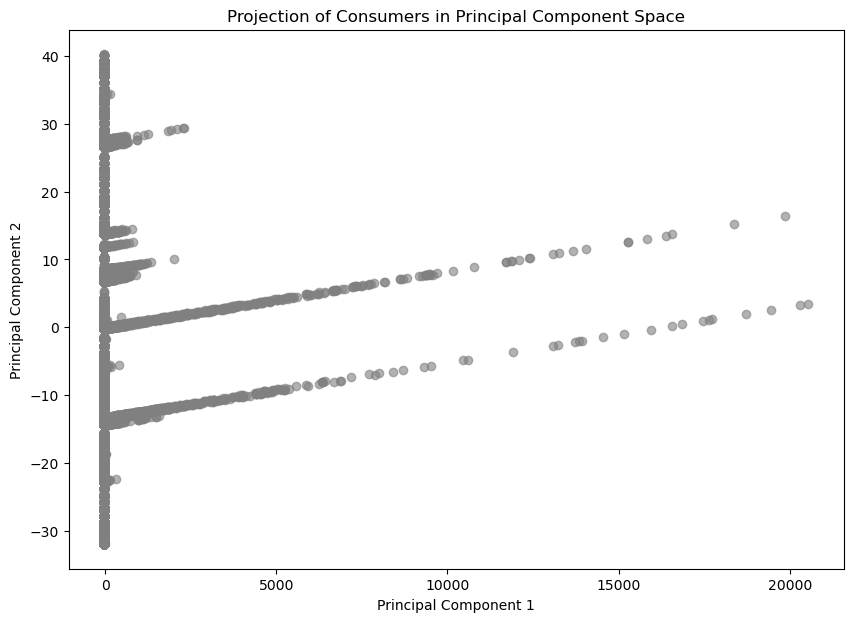

In [4]:
# Project data into the principal component space
MD_pca_projection = pca.transform(MD_x)

# Set up plot for the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(MD_pca_projection[:, 0], MD_pca_projection[:, 1], color="grey", alpha=0.6, label="Consumers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of Consumers in Principal Component Space")

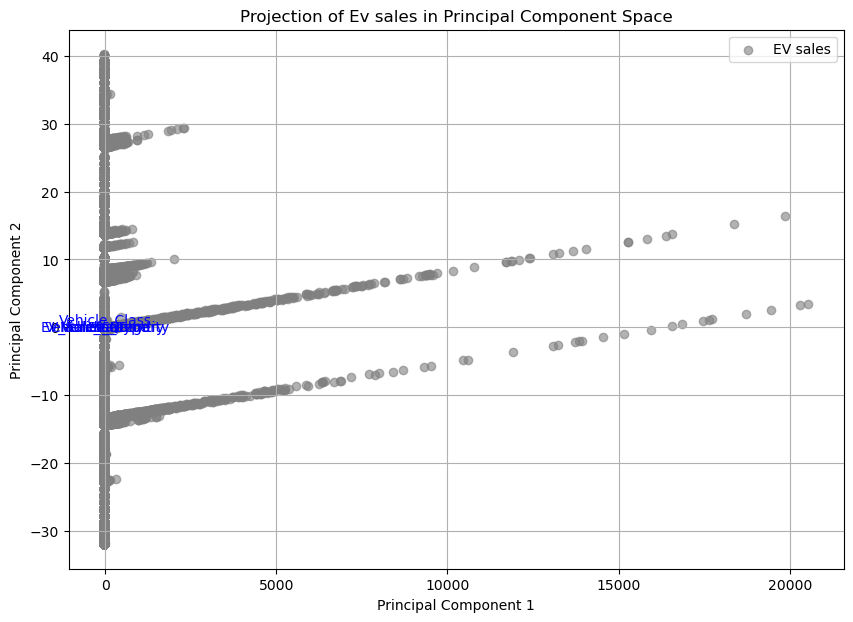

In [5]:
# Project data into the principal component space
plt.figure(figsize=(10, 7))
plt.scatter(MD_pca_projection[:, 0], MD_pca_projection[:, 1], color="grey", alpha=0.6, label="EV sales")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of Ev sales in Principal Component Space")

# Add the variable loadings as arrows
for i, (x, y) in enumerate(loadings[:, :2]):  # Use only the first two principal components
    plt.arrow(0, 0, x, y, color="blue", alpha=0.8, head_width=0.02)
    plt.text(x * 1.1, y * 1.1, MD_x.columns[i], color="blue", ha='center', va='center')

# Display the legend and plot
plt.legend()  # Ensure legend shows the "Consumers" label
plt.grid()
plt.show()

In [8]:
# Define range of segments to try (from 2 to 8)
num_segments = range(2, 7)
inertia = []

# Run Agglomerative Clustering for each segment number
for k in num_segments:
    clustering = AgglomerativeClustering(n_clusters=k)
    clustering.fit(MD_x)
    inertia.append(clustering.n_clusters)  # Note: Agglomerative doesn't use inertia directly

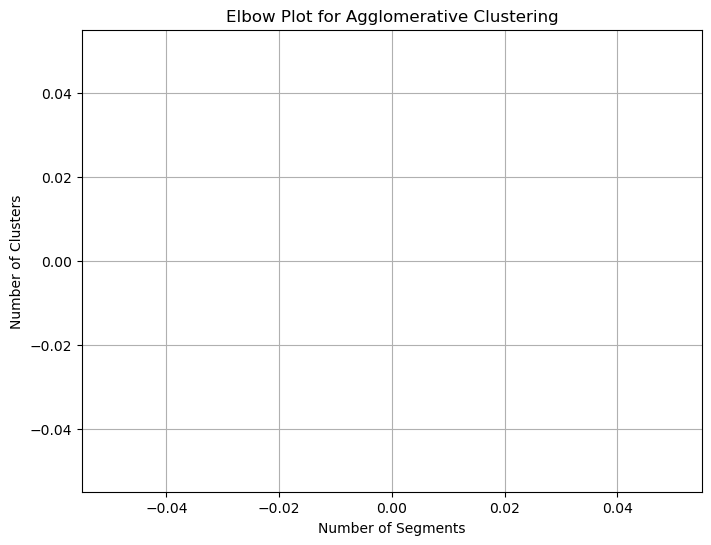

In [9]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(num_segments, inertia, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Number of Clusters")
plt.title("Elbow Plot for Agglomerative Clustering")
plt.grid()
plt.show()

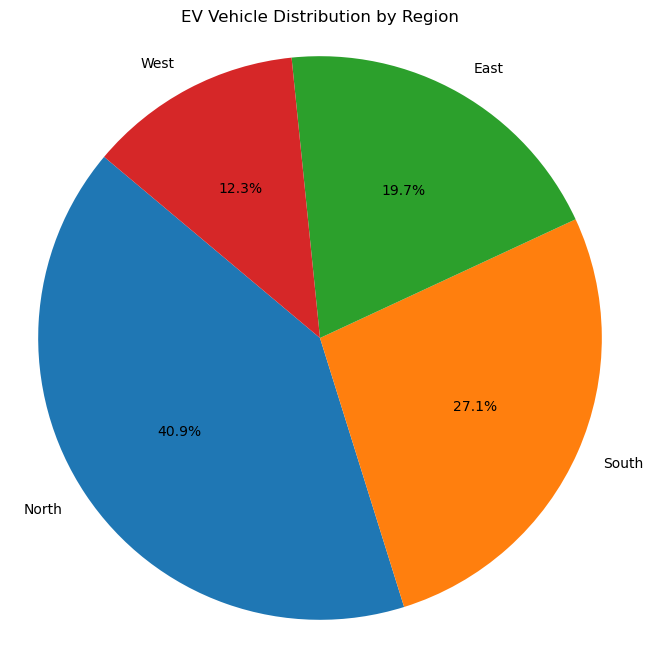

In [18]:
# Data
regions = ['North', 'South', 'East', 'West']
vehicle_counts_by_region = [1050, 695, 505, 315]  # Total vehicles per region

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_counts_by_region, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('EV Vehicle Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

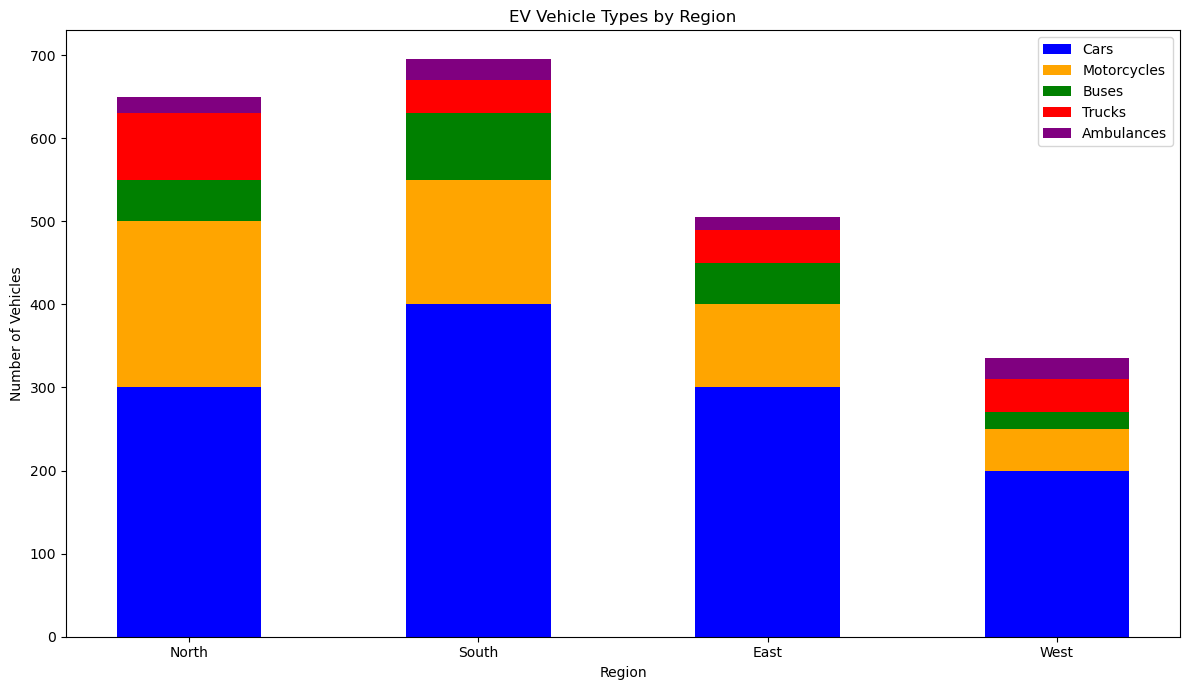

In [19]:
import numpy as np

# Data
regions = ['North', 'South', 'East', 'West']
car_counts = [300, 400, 300, 200]
motorcycle_counts = [200, 150, 100, 50]
bus_counts = [50, 80, 50, 20]
truck_counts = [80, 40, 40, 40]
ambulance_counts = [20, 25, 15, 25]

bar_width = 0.5
x = np.arange(len(regions))

# Stacked Bar Chart
plt.figure(figsize=(12, 7))
plt.bar(x, car_counts, width=bar_width, label='Cars', color='blue')
plt.bar(x, motorcycle_counts, width=bar_width, bottom=car_counts, label='Motorcycles', color='orange')
plt.bar(x, bus_counts, width=bar_width, bottom=np.array(car_counts) + np.array(motorcycle_counts), label='Buses', color='green')
plt.bar(x, truck_counts, width=bar_width, bottom=np.array(car_counts) + np.array(motorcycle_counts) + np.array(bus_counts), label='Trucks', color='red')
plt.bar(x, ambulance_counts, width=bar_width, bottom=np.array(car_counts) + np.array(motorcycle_counts) + np.array(bus_counts) + np.array(truck_counts), label='Ambulances', color='purple')

plt.title('EV Vehicle Types by Region')
plt.xlabel('Region')
plt.ylabel('Number of Vehicles')
plt.xticks(x, regions)
plt.legend()
plt.tight_layout()
plt.show()

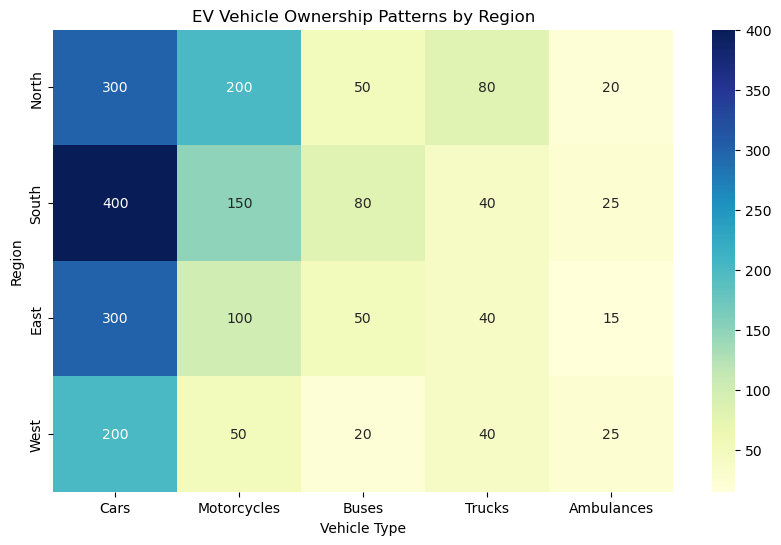

In [20]:
import seaborn as sns
import pandas as pd

# Hypothetical data for ownership
data = {
    'Region': ['North', 'South', 'East', 'West'],
    'Cars': [300, 400, 300, 200],
    'Motorcycles': [200, 150, 100, 50],
    'Buses': [50, 80, 50, 20],
    'Trucks': [80, 40, 40, 40],
    'Ambulances': [20, 25, 15, 25]
}

df = pd.DataFrame(data).set_index('Region')

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='d')
plt.title('EV Vehicle Ownership Patterns by Region')
plt.xlabel('Vehicle Type')
plt.ylabel('Region')
plt.show()